<a href="https://colab.research.google.com/github/yasmine-juarez/capstone/blob/main/Latin_America_Feature_Importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

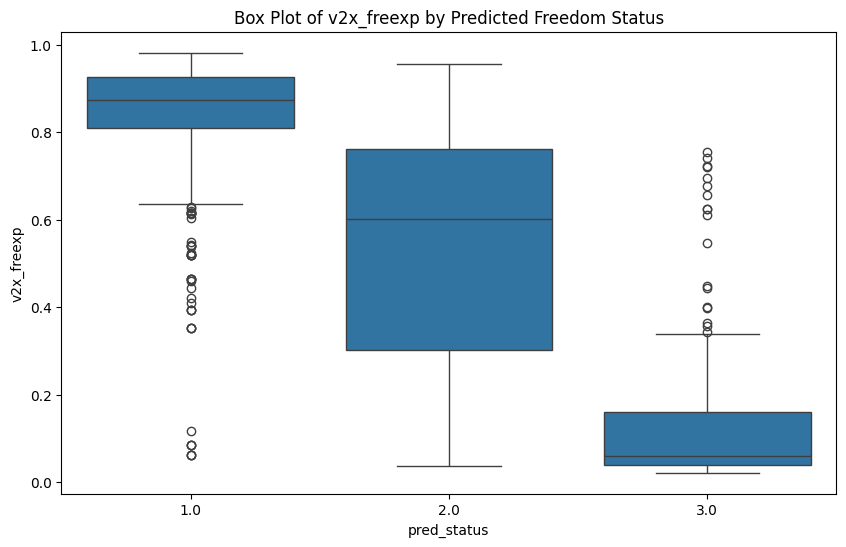


Summary Statistics for v2x_freexp by Predicted Freedom Status:
             count      mean       std    min    25%    50%      75%    max
pred_status                                                                
1.0          734.0  0.841317  0.133434  0.063  0.809  0.873  0.92675  0.982
2.0          693.0  0.523072  0.279912  0.037  0.302  0.601  0.76100  0.955
3.0          173.0  0.134260  0.168942  0.022  0.040  0.060  0.16100  0.754


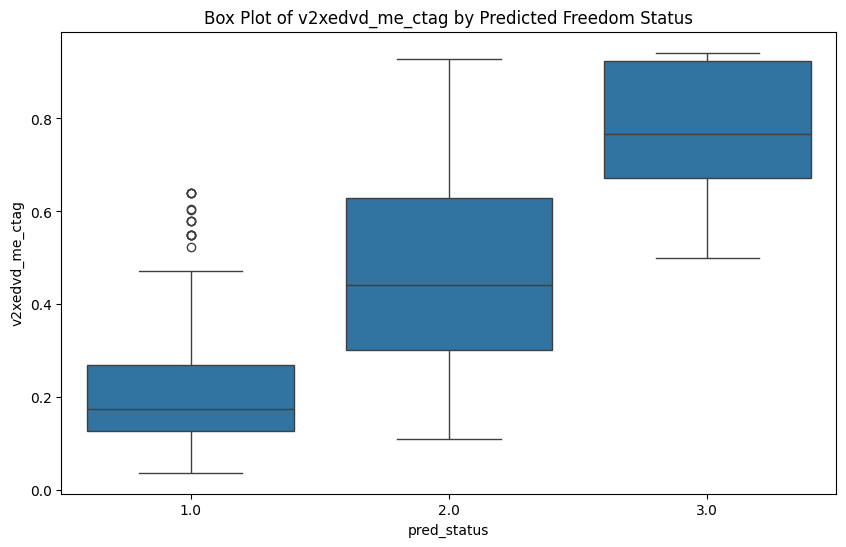


Summary Statistics for v2xedvd_me_ctag by Predicted Freedom Status:
             count      mean       std    min      25%    50%      75%    max
pred_status                                                                  
1.0          546.0  0.199289  0.107821  0.037  0.12600  0.175  0.26900  0.640
2.0          473.0  0.472410  0.205199  0.110  0.30100  0.442  0.62900  0.928
3.0           42.0  0.784190  0.134714  0.499  0.67175  0.766  0.92375  0.942


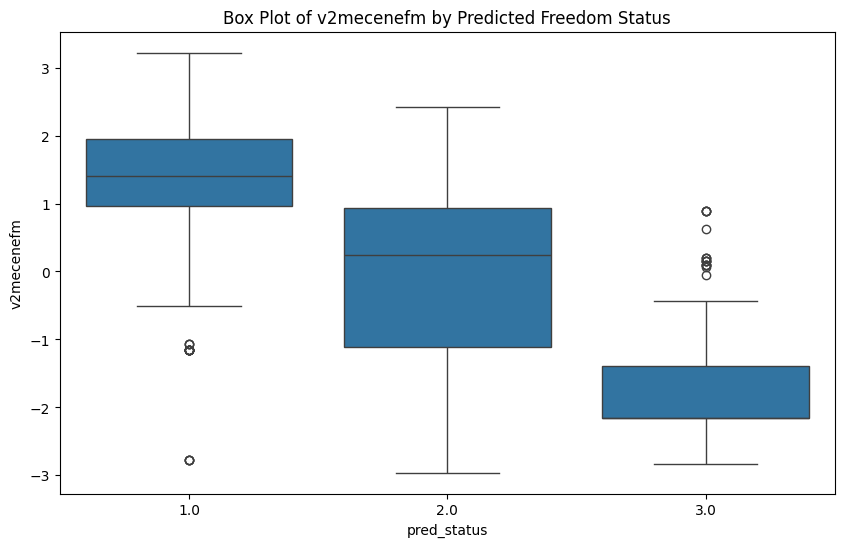


Summary Statistics for v2mecenefm by Predicted Freedom Status:
             count      mean       std    min    25%    50%    75%    max
pred_status                                                              
1.0          734.0  1.426440  0.820615 -2.781  0.965  1.402  1.953  3.224
2.0          693.0 -0.073180  1.419936 -2.962 -1.109  0.249  0.934  2.427
3.0          173.0 -1.741422  0.837637 -2.841 -2.152 -2.152 -1.397  0.891


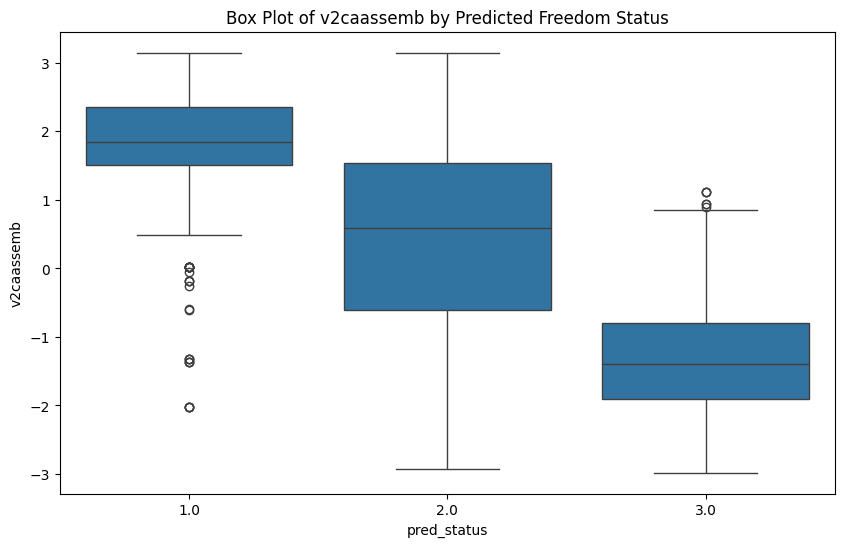


Summary Statistics for v2caassemb by Predicted Freedom Status:
             count      mean       std    min    25%    50%    75%    max
pred_status                                                              
1.0          734.0  1.831135  0.781070 -2.021  1.507  1.839  2.353  3.148
2.0          693.0  0.438111  1.376968 -2.924 -0.613  0.587  1.534  3.148
3.0          173.0 -1.258249  0.926323 -2.982 -1.906 -1.404 -0.796  1.117


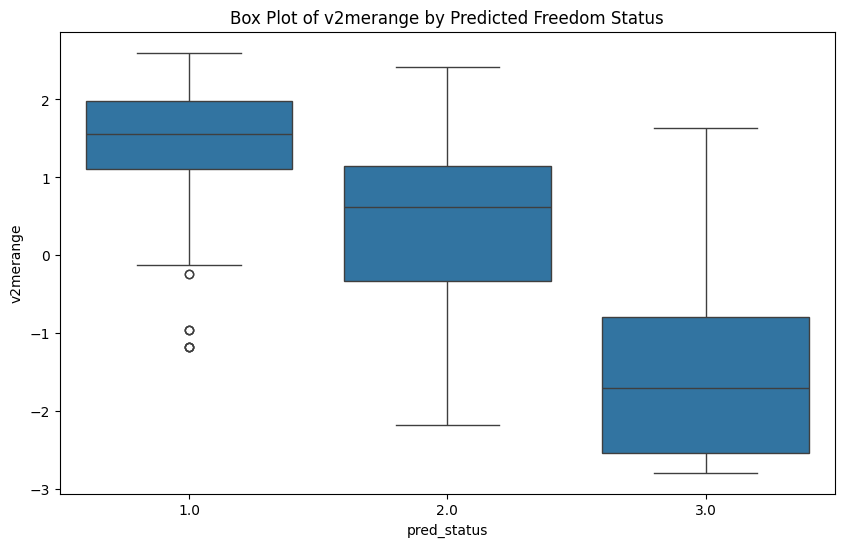


Summary Statistics for v2merange by Predicted Freedom Status:
             count      mean       std    min    25%    50%    75%    max
pred_status                                                              
1.0          734.0  1.487898  0.613971 -1.178  1.101  1.556  1.977  2.602
2.0          693.0  0.437472  1.062406 -2.188 -0.329  0.614  1.145  2.412
3.0          173.0 -1.535497  1.151116 -2.795 -2.548 -1.706 -0.799  1.639

ANOVA results for v2x_freexp:
F-statistic: nan, p-value: nan


<ipython-input-2-21ce9009cdcd>:36: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(free_data, partially_free_data, not_free_data)



Classification Report (with class weights):
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       220
         2.0       0.91      0.92      0.92       208
         3.0       0.96      0.83      0.89        52

    accuracy                           0.93       480
   macro avg       0.93      0.90      0.91       480
weighted avg       0.93      0.93      0.92       480


Feature Importances from Random Forest:
v2merange          0.262231
v2x_freexp         0.246662
v2mecenefm         0.209612
v2caassemb         0.142435
v2xedvd_me_ctag    0.139059
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


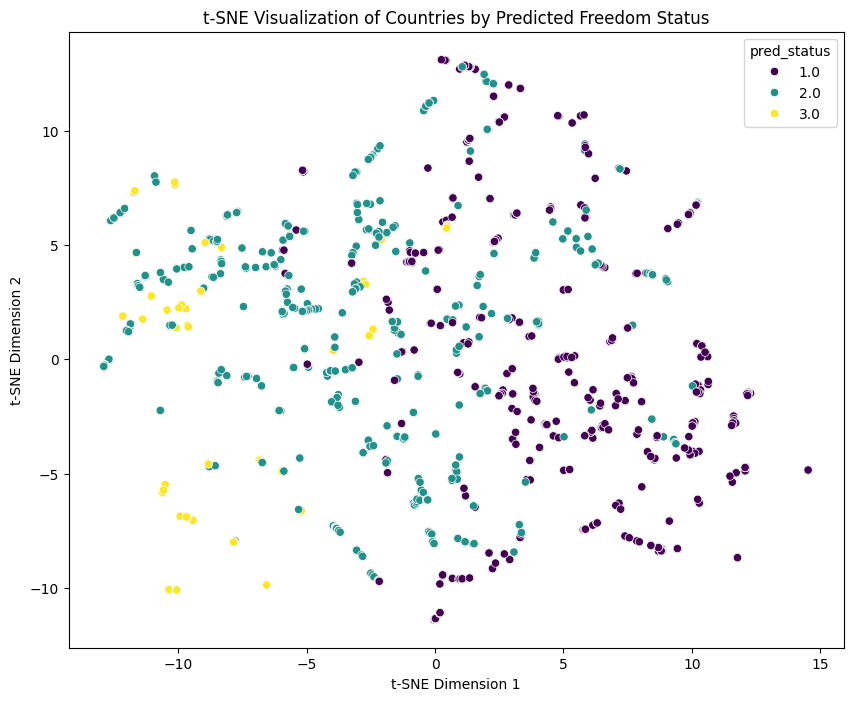

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)

status_mapping = {"Free": 1, "Partially Free": 2, "Not Free": 3} # If it's strings
# df['pred_status_encoded'] = df['pred_status'].map(status_mapping) # If it's strings

features_to_explore = ['v2x_freexp', 'v2xedvd_me_ctag','v2mecenefm','v2caassemb','v2merange']

for feature in features_to_explore:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='pred_status', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Predicted Freedom Status')
    plt.show()

    print(f"\nSummary Statistics for {feature} by Predicted Freedom Status:")
    print(df.groupby('pred_status')[feature].describe())

numerical_feature = 'v2x_freexp'
groups = df.groupby('pred_status')[numerical_feature].groups
free_data = df[df['pred_status'] == 'Free'][numerical_feature].dropna()
partially_free_data = df[df['pred_status'] == 'Partially Free'][numerical_feature].dropna()
not_free_data = df[df['pred_status'] == 'Not Free'][numerical_feature].dropna()

f_statistic, p_value = stats.f_oneway(free_data, partially_free_data, not_free_data)
print(f"\nANOVA results for {numerical_feature}:")
print(f"F-statistic: {f_statistic:.2f}, p-value: {p_value:.3f}")

X = df[features_to_explore].fillna(df[features_to_explore].mean())
y = df['pred_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

class_weights = compute_class_weight('balanced', classes=y_train.unique(), y=y_train)
class_weight_dict = dict(zip(y_train.unique(), class_weights))

model = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report (with class weights):")
print(classification_report(y_test, y_pred))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importances from Random Forest:")
print(feature_importances.sort_values(ascending=False))

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(X_scaled) - 1), n_iter=300)
X_embedded = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=df['pred_status'], palette='viridis')
plt.title('t-SNE Visualization of Countries by Predicted Freedom Status')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

from sklearn.preprocessing import LabelEncoder
true_labels = LabelEncoder().fit_transform(y)

ari = adjusted_rand_score(true_labels, kmeans_labels)
nmi = normalized_mutual_info_score(true_labels, kmeans_labels)

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")


Adjusted Rand Index: 0.335
Normalized Mutual Information: 0.335


In [ ]:
import pandas as pd

df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)

free_countries_df = df[df['pred_status'] == 1]
notfree_countries_df = df[df['pred_status'] == 3]

free_countries_list = free_countries_df['country_name'].tolist()
notfree_countries_list = notfree_countries_df['country_name'].tolist()


#print(free_countries_list)
print(notfree_countries_list)

['Suriname', 'Suriname', 'Suriname', 'Suriname', 'Suriname', 'Suriname', 'Suriname', 'Bolivia', 'Bolivia', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Peru', 'Peru', 'Peru', 'Peru', 'Peru', 'Peru', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Venezuela', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Nicaragua', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Guatemala', 'Panama', 'Panama', 'Panama', 'Panama', 'Panama', 'Panama', 'Panama', 'Panama', 'Panama', 'Pa

<ipython-input-9-2241fa4b9198>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  migrated_to_free_countries = df.groupby('country_name').apply(has_migrated_to_free)
<ipython-input-9-2241fa4b9198>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  migrated_to_not_free_countries = df.groupby('country_name').apply(has_migrated_to_not_free)
<ipython-input-9-2241fa4b9198>:45: FutureWarning: Operation between non 

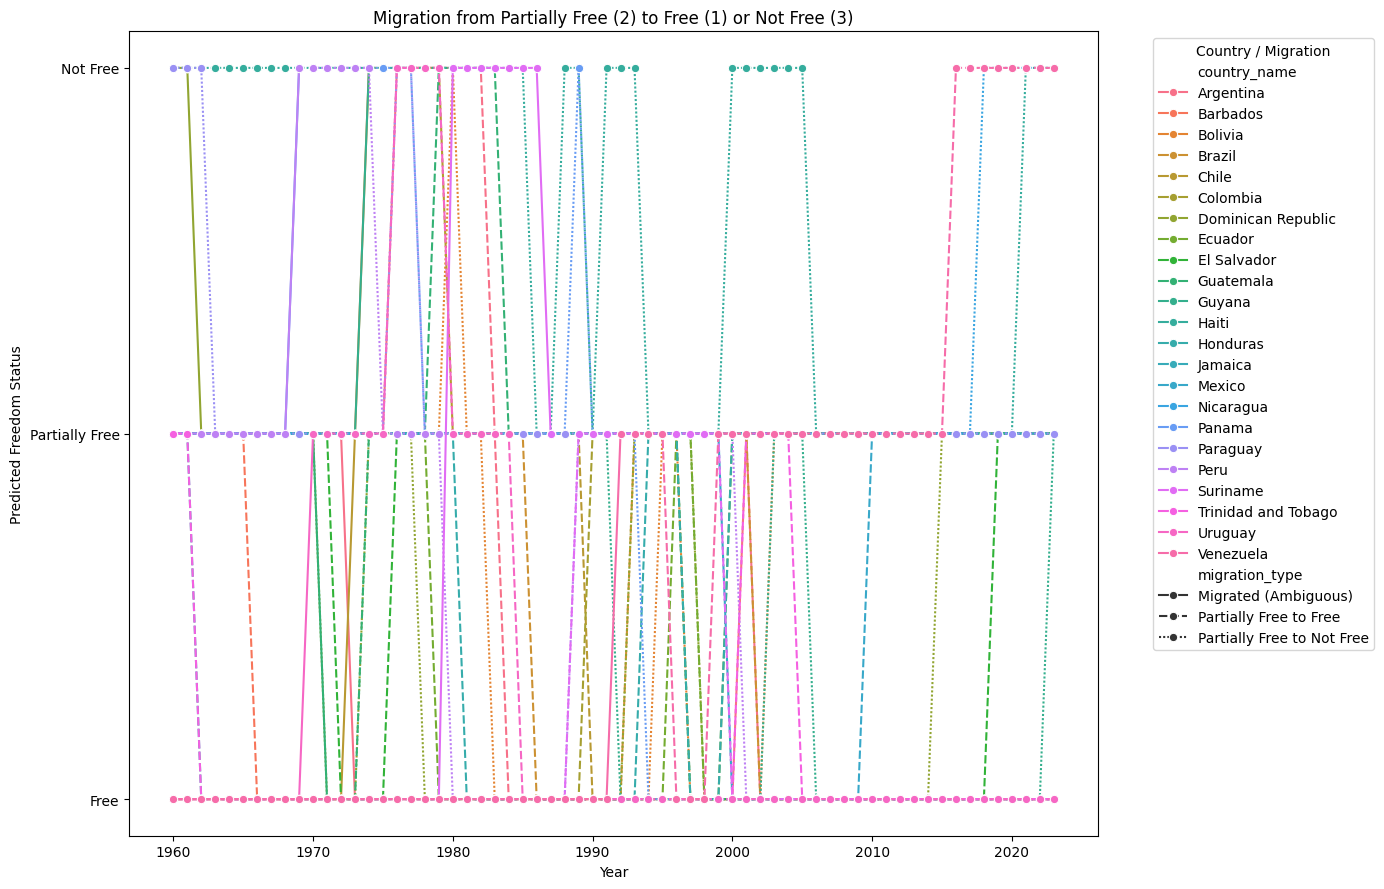


Countries that have ever migrated from Partially Free (2) to Free (1):
Argentina
Barbados
Bolivia
Brazil
Chile
Colombia
Dominican Republic
Ecuador
El Salvador
Guatemala
Guyana
Honduras
Jamaica
Mexico
Panama
Peru
Suriname
Trinidad and Tobago
Uruguay
Venezuela

Countries that have ever migrated from Partially Free (2) to Not Free (3):
Argentina
Bolivia
Chile
Dominican Republic
Guatemala
Guyana
Haiti
Nicaragua
Panama
Paraguay
Peru
Suriname
Uruguay
Venezuela


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)


df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(subset=['year'], inplace=True)  # Remove rows with invalid years

df.sort_values(by=['country_name', 'year'], inplace=True)

def has_migrated_to_free(group):
    was_partially_free = (group['pred_status'] == 2).any()
    became_free = (group['pred_status'] == 1).any()
    return was_partially_free and became_free

# Function to check for "2" to "3" migration
def has_migrated_to_not_free(group):
    was_partially_free = (group['pred_status'] == 2).any()
    became_not_free = (group['pred_status'] == 3).any()
    return was_partially_free and became_not_free

# Identify countries that have ever migrated from 2 to 1
migrated_to_free_countries = df.groupby('country_name').apply(has_migrated_to_free)
migrated_to_free_names = migrated_to_free_countries[migrated_to_free_countries].index.tolist()

# Identify countries that have ever migrated from 2 to 3
migrated_to_not_free_countries = df.groupby('country_name').apply(has_migrated_to_not_free)
migrated_to_not_free_names = migrated_to_not_free_countries[migrated_to_not_free_countries].index.tolist()

# Filter the DataFrame for both migration types
migrated_df = df[df['country_name'].isin(migrated_to_free_names + migrated_to_not_free_names)]

# new column to indicate the migration type for coloring
def get_migration_type(row):
    country = row['country_name']
    if country in migrated_to_free_names and country in migrated_to_not_free_names:

        first_2_to_1_year = df[(df['country_name'] == country) & (df['pred_status'] == 1) & (df[df['year'] < row['year']].groupby('country_name')['pred_status'].transform(lambda x: (x == 2).any()))]['year'].min()
        first_2_to_3_year = df[(df['country_name'] == country) & (df['pred_status'] == 3) & (df[df['year'] < row['year']].groupby('country_name')['pred_status'].transform(lambda x: (x == 2).any()))]['year'].min()

        if pd.notna(first_2_to_3_year) and (pd.isna(first_2_to_1_year) or first_2_to_3_year < first_2_to_1_year):
            return 'Partially Free to Not Free'
        elif pd.notna(first_2_to_1_year):
            return 'Partially Free to Free'
        else:
            return 'Migrated (Ambiguous)' # Should ideally not happen
    elif country in migrated_to_free_names:
        return 'Partially Free to Free'
    elif country in migrated_to_not_free_names:
        return 'Partially Free to Not Free'
    return 'No Migration'

migrated_df['migration_type'] = migrated_df.apply(get_migration_type, axis=1)
migrated_df = migrated_df[migrated_df['migration_type'] != 'No Migration']

plt.figure(figsize=(14, 9))
sns.lineplot(x='year', y='pred_status', hue='country_name', style='migration_type', data=migrated_df, marker='o')
plt.title('Migration from Partially Free (2) to Free (1) or Not Free (3)')
plt.xlabel('Year')
plt.ylabel('Predicted Freedom Status')
plt.yticks([1, 2, 3], ['Free', 'Partially Free', 'Not Free'])
plt.legend(title='Country / Migration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nCountries that have ever migrated from Partially Free (2) to Free (1):")
for country in migrated_to_free_names:
    print(country)

print("\nCountries that have ever migrated from Partially Free (2) to Not Free (3):")
for country in migrated_to_not_free_names:
    print(country)

print("\n Countries gone between both migration types:")
for country in set(migrated_to_free_names) & set(migrated_to_not_free_names):
    print(country)

In [ ]:
print("\nCountries that have ever migrated from Partially Free (2) to Free (1):")
for country in migrated_to_free_names:
    print(country)

print("\nCountries that have ever migrated from Partially Free (2) to Not Free (3):")
for country in migrated_to_not_free_names:
    print(country)

print("\n Countries gone between both migration types:")
for country in set(migrated_to_free_names) & set(migrated_to_not_free_names):
    print(country)


Countries that have ever migrated from Partially Free (2) to Free (1):
Argentina
Barbados
Bolivia
Brazil
Chile
Colombia
Dominican Republic
Ecuador
El Salvador
Guatemala
Guyana
Honduras
Jamaica
Mexico
Panama
Peru
Suriname
Trinidad and Tobago
Uruguay
Venezuela

Countries that have ever migrated from Partially Free (2) to Not Free (3):
Argentina
Bolivia
Chile
Dominican Republic
Guatemala
Guyana
Haiti
Nicaragua
Panama
Paraguay
Peru
Suriname
Uruguay
Venezuela

 Countries gone between both migration types:
Peru
Bolivia
Guyana
Suriname
Panama
Uruguay
Chile
Argentina
Guatemala
Dominican Republic
Venezuela


<ipython-input-7-34bcbc5affeb>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  migrated_to_free_countries = df.groupby('country_name').apply(has_migrated_to_free)
<ipython-input-7-34bcbc5affeb>:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  migrated_to_not_free_countries = df.groupby('country_name').apply(has_migrated_to_not_free)


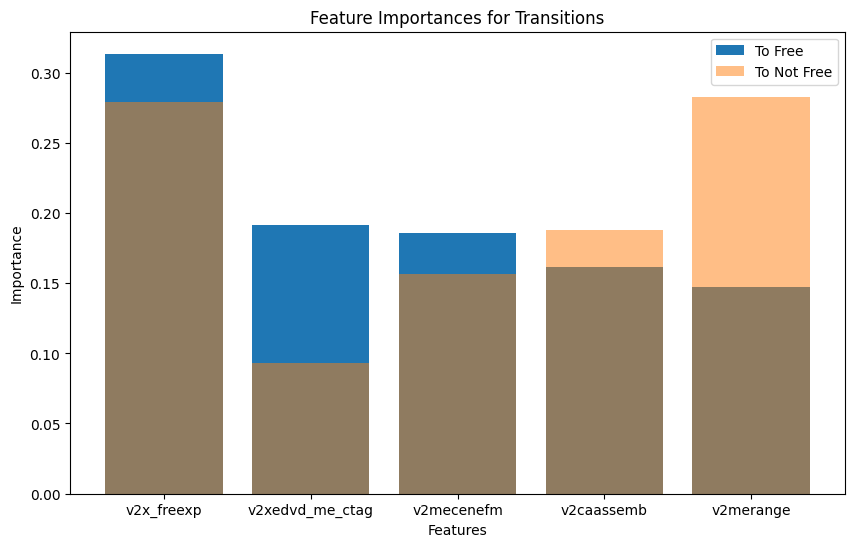

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)


df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(subset=['year'], inplace=True)

df.sort_values(by=['country_name', 'year'], inplace=True)

def has_migrated_to_free(group):
    was_partially_free = (group['pred_status'] == 2).any()
    became_free = (group['pred_status'] == 1).any()
    return was_partially_free and became_free

def has_migrated_to_not_free(group):
    was_partially_free = (group['pred_status'] == 2).any()
    became_not_free = (group['pred_status'] == 3).any()
    return was_partially_free and became_not_free

migrated_to_free_countries = df.groupby('country_name').apply(has_migrated_to_free)
migrated_to_free_names = migrated_to_free_countries[migrated_to_free_countries].index.tolist()

migrated_to_not_free_countries = df.groupby('country_name').apply(has_migrated_to_not_free)
migrated_to_not_free_names = migrated_to_not_free_countries[migrated_to_not_free_countries].index.tolist()

df_to_free = df[df['country_name'].isin(migrated_to_free_names)]
df_to_not_free = df[df['country_name'].isin(migrated_to_not_free_names)]
features_to_explore = ['v2x_freexp', 'v2xedvd_me_ctag','v2mecenefm','v2caassemb','v2merange']

X_free = df_to_free[features_to_explore]
y_free = df_to_free['pred_status'].shift(-1).apply(lambda x: 1 if x == 1 else 0)

model_free = RandomForestClassifier(random_state=42)
model_free.fit(X_free, y_free)


X_not_free = df_to_not_free[features_to_explore]
y_not_free = df_to_not_free['pred_status'].shift(-1).apply(lambda x: 1 if x == 3 else 0)

model_not_free = RandomForestClassifier(random_state=42)
model_not_free.fit(X_not_free, y_not_free)



importances_free = model_free.feature_importances_
importances_not_free = model_not_free.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(features_to_explore, importances_free, label='To Free')
plt.bar(features_to_explore, importances_not_free, label='To Not Free', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Transitions')
plt.legend()
plt.show()


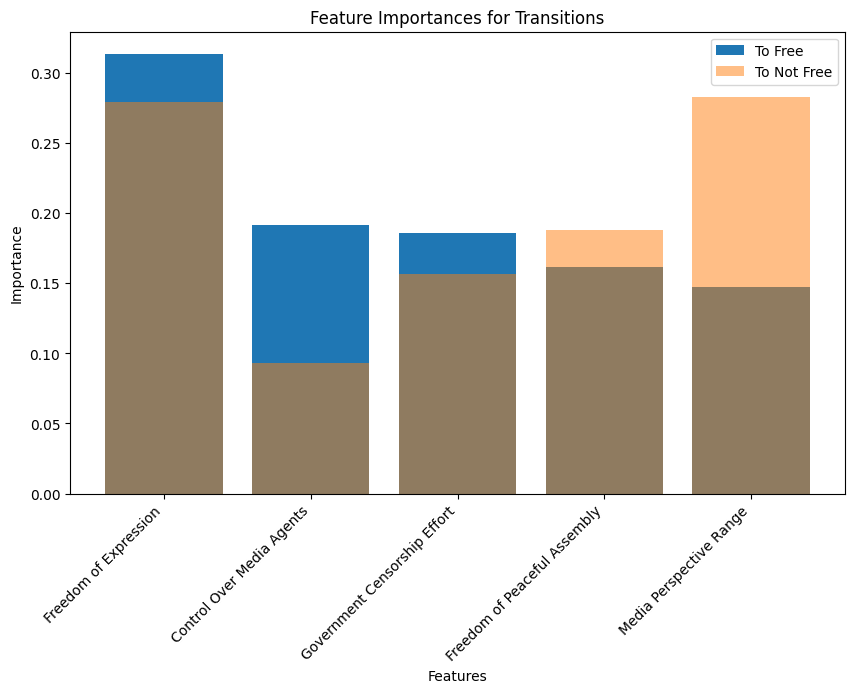

In [ ]:
new_feature_names = ['Freedom of Expression', 'Control Over Media Agents', 'Government Censorship Effort', 'Freedom of Peaceful Assembly', 'Media Perspective Range']
plt.figure(figsize=(10, 6))
plt.bar(new_feature_names, importances_free, label='To Free')
plt.bar(new_feature_names, importances_not_free, label='To Not Free', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Transitions')
plt.legend()
plt.show()